## Wczytanie danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://pwozniak.kia.prz.edu.pl/files/uczeniemaszynowe/train_data.csv')

## Eksploracja danych

In [2]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,59,Arcanine,Fire,NaN,555,82,110,88,105,72,98,1,False
1,107,Hitmonchan,Fighting,NaN,455,47,97,84,27,121,79,1,False
2,123,Scyther,Bug,Flying,500,63,113,86,56,73,109,1,False
3,35,Clefairy,Fairy,NaN,323,67,54,46,58,62,36,1,False
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,97,193,102,157,98,133,1,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           3320 non-null   int64 
 1   Name        3320 non-null   object
 2   Type 1      3320 non-null   object
 3   Type 2      1560 non-null   object
 4   Total       3320 non-null   int64 
 5   HP          3320 non-null   int64 
 6   Attack      3320 non-null   int64 
 7   Defense     3320 non-null   int64 
 8   Sp. Atk     3320 non-null   int64 
 9   Sp. Def     3320 non-null   int64 
 10  Speed       3320 non-null   int64 
 11  Generation  3320 non-null   int64 
 12  Legendary   3320 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 314.6+ KB


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.0
mean,75.819277,426.813253,65.925000,76.491867,70.749398,71.862048,69.129217,72.655723,1.0
std,45.023818,115.545921,28.591967,31.307924,29.011751,34.865423,26.255710,30.095827,0.0
min,1.000000,195.000000,-1.000000,-1.000000,-1.000000,5.000000,10.000000,5.000000,1.0
25%,36.000000,325.000000,47.000000,54.000000,50.000000,46.000000,49.000000,49.000000,1.0
50%,76.500000,436.500000,62.000000,74.000000,67.000000,65.000000,70.000000,71.000000,1.0
75%,115.000000,500.000000,81.000000,96.000000,87.000000,94.000000,88.000000,93.000000,1.0
max,151.000000,780.000000,255.000000,199.000000,189.000000,202.000000,137.000000,159.000000,1.0


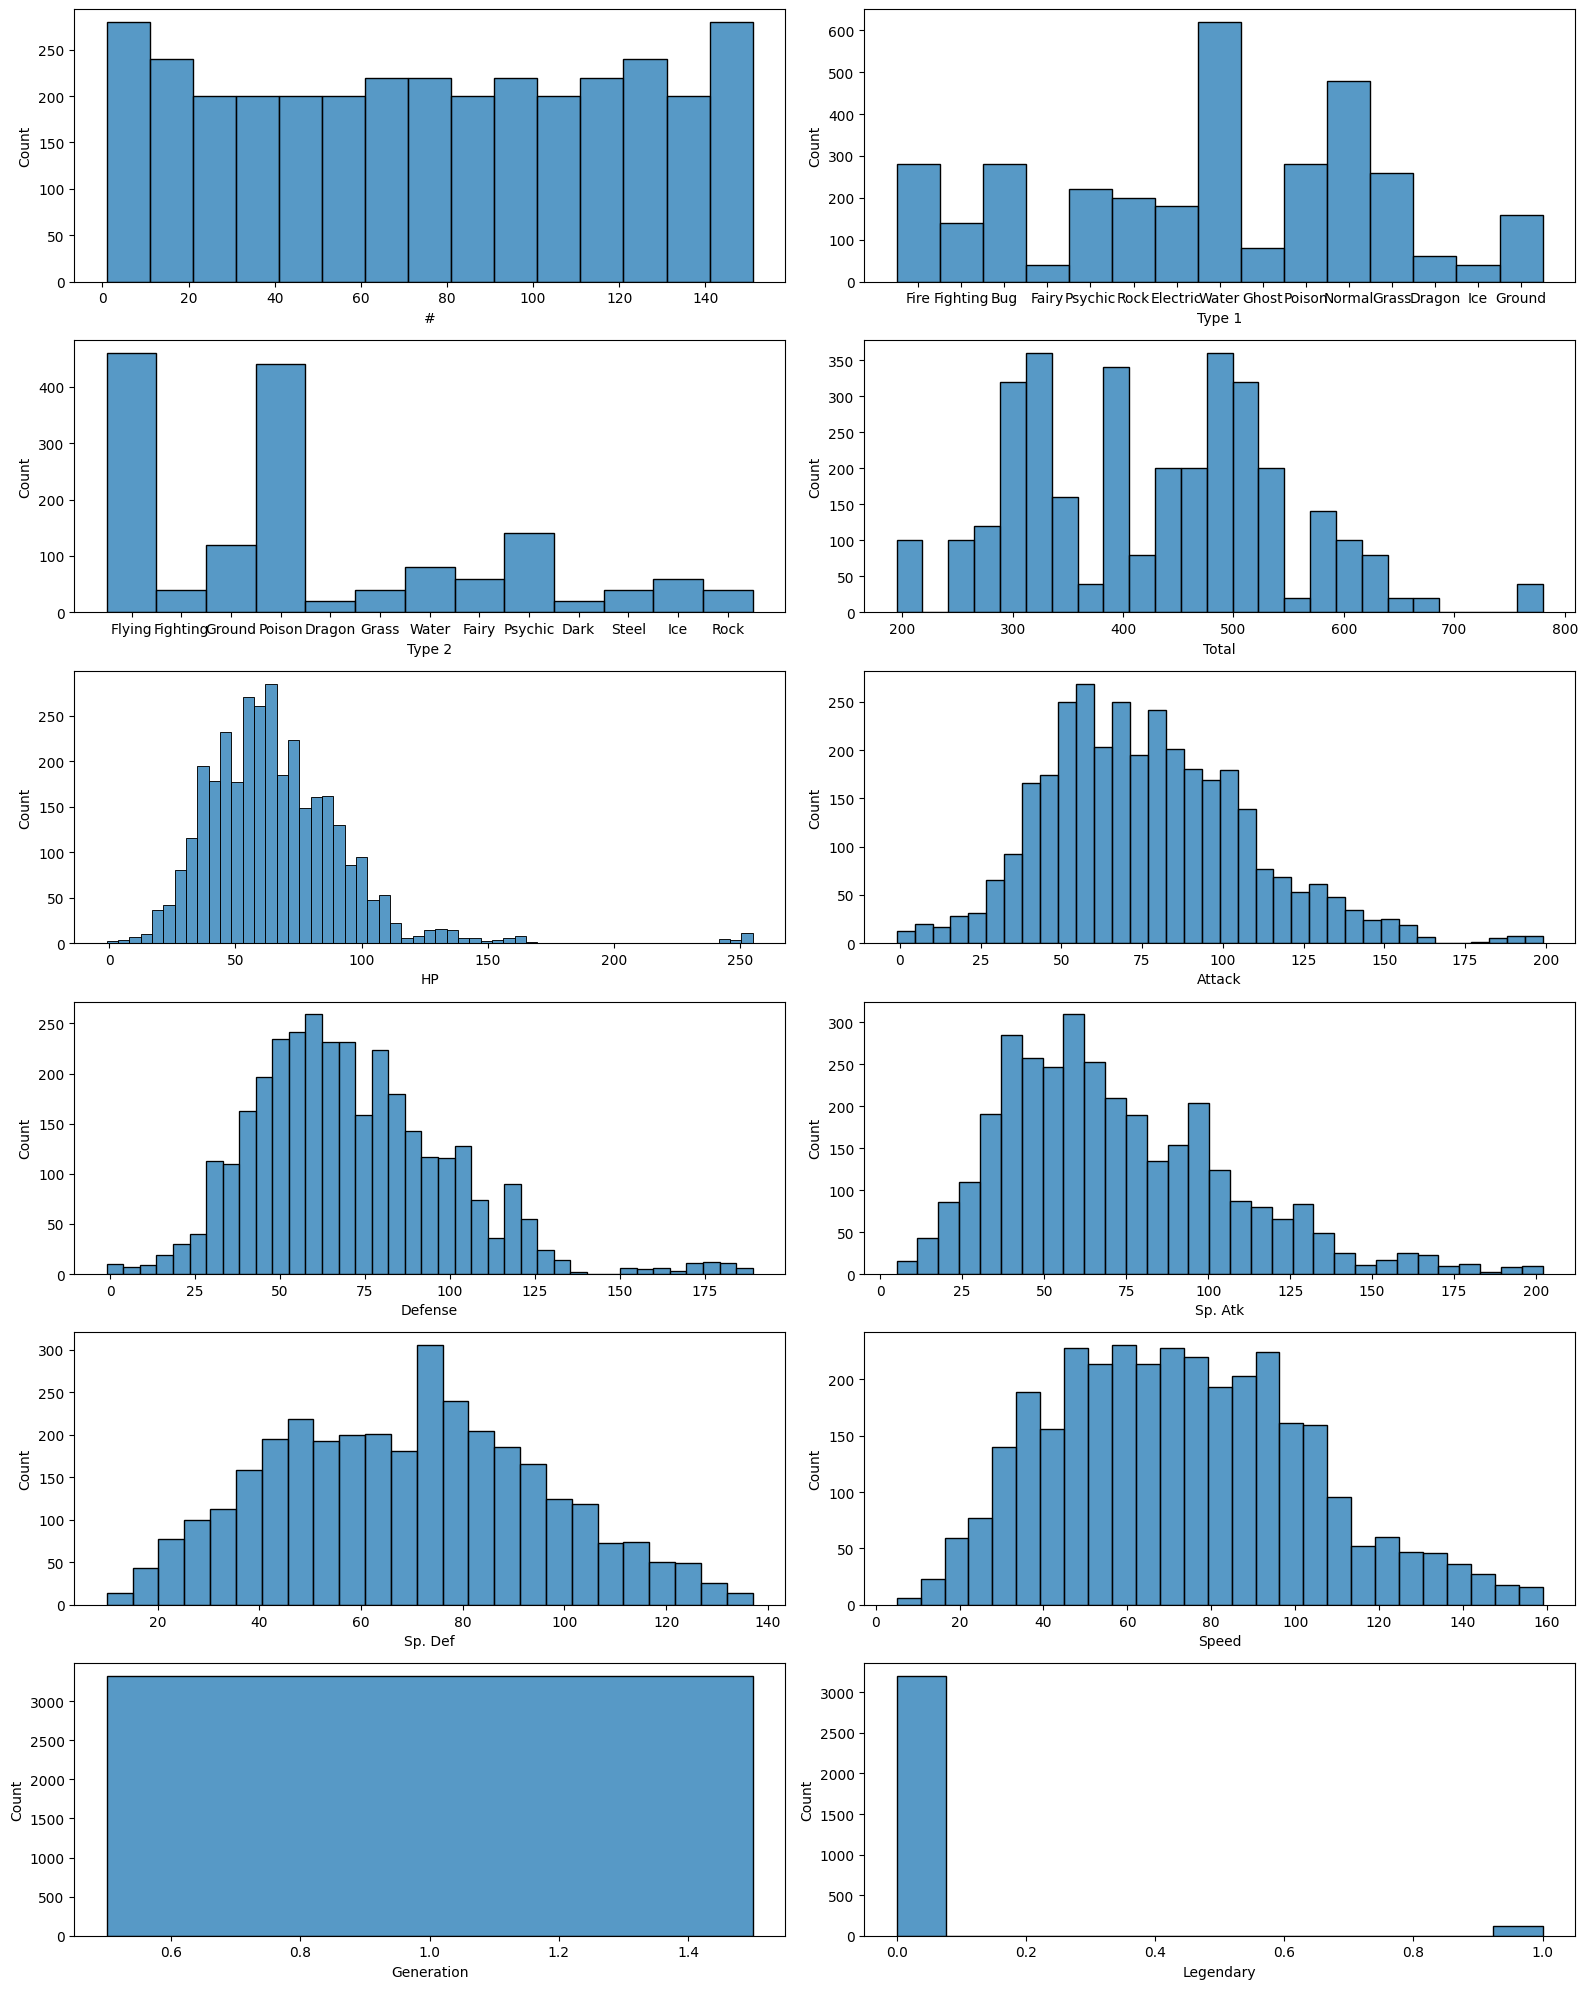

In [5]:
plt.figure(figsize=(16, 20))
columns = [column for column in df.columns if column != 'Name']
for i, column in enumerate(columns):
    plt.subplot(6, 2, i + 1)
    sns.histplot(data=df, x=column)

plt.tight_layout()
plt.show()

## Przetwarzanie danych

### Wykrywanie i obsługa brakujących wartości

In [6]:
for column in df.columns:
    print(f"Liczba brakujących danych dla {column}: {sum(df.isna()[column])}")

Liczba brakujących danych dla #: 0
Liczba brakujących danych dla Name: 0
Liczba brakujących danych dla Type 1: 0
Liczba brakujących danych dla Type 2: 1760
Liczba brakujących danych dla Total: 0
Liczba brakujących danych dla HP: 0
Liczba brakujących danych dla Attack: 0
Liczba brakujących danych dla Defense: 0
Liczba brakujących danych dla Sp. Atk: 0
Liczba brakujących danych dla Sp. Def: 0
Liczba brakujących danych dla Speed: 0
Liczba brakujących danych dla Generation: 0
Liczba brakujących danych dla Legendary: 0


In [7]:
df.fillna("Absence", inplace=True)

In [8]:
for column in df.columns:
    print(f"Liczba brakujących danych dla {column}: {sum(df.isna()[column])}")

Liczba brakujących danych dla #: 0
Liczba brakujących danych dla Name: 0
Liczba brakujących danych dla Type 1: 0
Liczba brakujących danych dla Type 2: 0
Liczba brakujących danych dla Total: 0
Liczba brakujących danych dla HP: 0
Liczba brakujących danych dla Attack: 0
Liczba brakujących danych dla Defense: 0
Liczba brakujących danych dla Sp. Atk: 0
Liczba brakujących danych dla Sp. Def: 0
Liczba brakujących danych dla Speed: 0
Liczba brakujących danych dla Generation: 0
Liczba brakujących danych dla Legendary: 0


In [9]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,59,Arcanine,Fire,Absence,555,82,110,88,105,72,98,1,False
1,107,Hitmonchan,Fighting,Absence,455,47,97,84,27,121,79,1,False
2,123,Scyther,Bug,Flying,500,63,113,86,56,73,109,1,False
3,35,Clefairy,Fairy,Absence,323,67,54,46,58,62,36,1,False
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,97,193,102,157,98,133,1,True


### Usuwanie duplikatów

In [10]:
print(f"Liczba zduplikowanych wierszy: {sum(df.duplicated())}")

Liczba zduplikowanych wierszy: 0


### Sortowanie na podstawie numeru pokemona

In [11]:
df = df.sort_values('#').reset_index(drop=True)

In [12]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,52,58,52,48,49,59,1,False
1,1,Bulbasaur,Grass,Poison,318,47,46,40,62,70,53,1,False
2,1,Bulbasaur,Grass,Poison,318,55,53,58,45,56,51,1,False
3,1,Bulbasaur,Grass,Poison,318,40,44,43,74,62,55,1,False
4,1,Bulbasaur,Grass,Poison,318,35,54,56,59,72,42,1,False
5,1,Bulbasaur,Grass,Poison,318,45,53,63,67,42,48,1,False
6,1,Bulbasaur,Grass,Poison,318,55,65,47,52,53,46,1,False
7,1,Bulbasaur,Grass,Poison,318,42,51,42,76,68,39,1,False
8,1,Bulbasaur,Grass,Poison,318,37,47,58,68,57,51,1,False
9,1,Bulbasaur,Grass,Poison,318,44,55,40,69,61,49,1,False


In [13]:
df.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3310,151,Mew,Psychic,Absence,600,98,92,97,100,105,108,1,False
3311,151,Mew,Psychic,Absence,600,104,98,101,103,102,92,1,False
3312,151,Mew,Psychic,Absence,600,104,104,107,96,91,98,1,False
3313,151,Mew,Psychic,Absence,600,105,103,103,93,101,95,1,False
3314,151,Mew,Psychic,Absence,600,105,96,103,99,104,93,1,False
3315,151,Mew,Psychic,Absence,600,100,95,103,103,101,98,1,False
3316,151,Mew,Psychic,Absence,600,107,107,98,96,94,98,1,False
3317,151,Mew,Psychic,Absence,600,87,91,105,106,107,104,1,False
3318,151,Mew,Psychic,Absence,600,102,105,92,101,107,93,1,False
3319,151,Mew,Psychic,Absence,600,100,105,108,97,99,91,1,False


## Analiza danych

### Grupowanie danych według typu Pokemona. Wyznaczenie średnich statystyk dla każdego typu pokemona

In [15]:
df.groupby(["Type 1", "Type 2"]).agg({'Total' : ['mean', 'std'], 'HP' : ['mean', 'std'], 'Attack' : ['mean', 'std'], 'Defense' : ['mean', 'std'], 
3                                      'Sp. Atk' : ['mean', 'std'], 'Speed' : ['mean', 'std'], 'Legendary' : 'sum'})

Total                      HP                 Attack  \
                         mean         std        mean        std        mean   
Type 1   Type 2                                                                
Bug      Absence   300.000000  142.674217   53.183333   9.975379   57.866667   
         Flying    498.333333   84.405532   64.916667   6.287711  103.450000   
         Grass     345.000000   60.764362   47.800000  14.754747   82.775000   
         Poison    340.833333  115.679093   58.525000  12.323348   69.641667   
Dragon   Absence   360.000000   60.764362   51.400000  11.922399   73.175000   
         Flying    600.000000    0.000000   91.300000   5.768335  135.100000   
Electric Absence   438.333333   81.821011   54.208333  13.307542   62.366667   
         Flying    580.000000    0.000000   87.700000   4.995788   91.550000   
         Steel     395.000000   70.891756   38.525000  13.004905   45.975000   
Fairy    Absence   403.000000   81.019149   83.000000  13.585437   56.325000   
Fighting Absence   412.142857   73.104692   63.500000  17.458893  102.728571   
Fire     Absence   435.300000   88.735449   59.830000  15.827941   82.565000   
         Dragon    634.000000    0.000000   77.300000   5.242539  130.550000   
         Flying    582.666667   41.213239   82.066667   8.100778   94.816667   
Ghost    Poison    453.750000  108.579726   48.050000  14.101710   54.112500   
Grass    Absence   435.000000    0.000000   66.750000   6.373258   53.750000   
         Poison    425.800000   99.782477   64.180000  14.670848   75.290000   
         Psychic   422.500000   98.742088   78.700000  19.396272   67.350000   
Ground   Absence   360.833333   69.295171   47.675000  20.997864   74.008333   
         Rock      415.000000   70.891756   94.325000  11.793930  106.225000   
Ice      Flying    580.000000    0.000000   88.900000   5.128866   85.100000   
         Psychic   455.000000    0.000000   64.100000   6.496153   51.800000   
Normal   Absence   411.461538   98.869764   87.850000  57.639311   69.550000   
         Fairy     352.500000   83.550998  128.425000  13.887621   56.750000   
         Flying    387.111111  103.783665   57.838889  17.895464   74.833333   
Poison   Absence   365.900000   80.131111   61.480000  19.903274   71.665000   
         Flying    350.000000  106.337634   57.450000  18.903195   62.700000   
         Ground    505.000000    0.000000   85.250000   7.073787   97.725000   
Psychic  Absence   519.000000  150.092709   70.094444  28.803068   70.033333   
         Fairy     460.000000    0.000000   40.550000   4.978639   45.650000   
         Fighting  780.000000    0.000000  105.600000   5.295480  190.350000   
Rock     Flying    565.000000   50.636968   81.675000   6.358469  119.275000   
         Ground    392.500000   69.582844   51.750000  17.860571   85.112500   
         Water     425.000000   70.441645   49.100000  18.491599   74.087500   
Water    Absence   388.631579  104.777795   56.194737  26.234561   66.784211   
         Dark      640.000000    0.000000   94.600000   4.816638  154.850000   
         Fighting  510.000000    0.000000   90.050000   6.353408   95.400000   
         Flying    540.000000    0.000000   95.050000   5.010253  124.650000   
         Ice       511.666667   26.468188   88.366667  34.159629   84.550000   
         Poison    425.000000   91.146543   59.800000  20.337158   53.700000   
         Psychic   478.750000  101.904336   86.187500  15.650530   73.100000   

                                 Defense                Sp. Atk             \
                         std        mean        std        mean        std   
Type 1   Type 2                                                              
Bug      Absence   48.548584   63.216667  27.519541   33.150000  16.549694   
         Flying    45.062452   82.833333  29.030181   69.600000  13.873765   
         Grass     13.625932   67.975000  13.916394   52.450000   9.708442   
         Poison    41.215930   44.8

### Analiza liczby wierszy o każdym pokemonie (nazwie)

In [22]:
grouped_names = df.groupby('Name').agg(number_of_pokemons = ('Generation', 'count'))
grouped_names.head(10)

,number_of_pokemons
Name,
Abra,20
Aerodactyl,20
AerodactylMega Aerodactyl,20
Alakazam,20
AlakazamMega Alakazam,20
Arbok,20
Arcanine,20
Articuno,20
Beedrill,20


In [23]:
grouped_names.tail(10)

,number_of_pokemons
Name,
Vileplume,20
Voltorb,20
Vulpix,20
Wartortle,20
Weedle,20
Weepinbell,20
Weezing,20
Wigglytuff,20
Zapdos,20


In [26]:
print(f"Minimalna liczba pokemonów: {np.min(grouped_names)}")
print(f"Średnia liczba pokemonów: {np.mean(grouped_names)}")
print(f"Maksymalna liczba pokemonów: {np.max(grouped_names)}")

Minimalna liczba pokemonów: 20
Średnia liczba pokemonów: 20.0
Maksymalna liczba pokemonów: 20


### Wyznaczenie liczby błędnych danych.

In [27]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,52,58,52,48,49,59,1,False
1,1,Bulbasaur,Grass,Poison,318,47,46,40,62,70,53,1,False
2,1,Bulbasaur,Grass,Poison,318,55,53,58,45,56,51,1,False
3,1,Bulbasaur,Grass,Poison,318,40,44,43,74,62,55,1,False
4,1,Bulbasaur,Grass,Poison,318,35,54,56,59,72,42,1,False


In [35]:
df[df.Total != df.HP + df.Attack + df.Defense + df['Sp. Atk'] + df['Sp. Def'] + df.Speed]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [41]:
columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for column in columns:
    print(f"Wiersze w {column} które mają wartość poniżej lub równe 0: {len(df[df[column] <= 0])}")

Wiersze w Total które mają wartość poniżej lub równe 0: 0
Wiersze w HP które mają wartość poniżej lub równe 0: 1
Wiersze w Attack które mają wartość poniżej lub równe 0: 3
Wiersze w Defense które mają wartość poniżej lub równe 0: 8
Wiersze w Sp. Atk które mają wartość poniżej lub równe 0: 0
Wiersze w Sp. Def które mają wartość poniżej lub równe 0: 0
Wiersze w Speed które mają wartość poniżej lub równe 0: 0


In [46]:
df[(df.HP <= 0) | (df.Attack <= 0) | (df.Defense <= 0)] 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1118,50,Diglett,Ground,Absence,265,-1,56,34,26,50,100,1,False
2420,113,Chansey,Normal,Absence,450,250,10,-1,43,101,47,1,False
2422,113,Chansey,Normal,Absence,450,253,3,-1,36,113,46,1,False
2423,113,Chansey,Normal,Absence,450,243,12,0,42,105,48,1,False
2427,113,Chansey,Normal,Absence,450,254,-1,7,35,115,40,1,False
2428,113,Chansey,Normal,Absence,450,250,1,-1,30,113,57,1,False
2432,113,Chansey,Normal,Absence,450,247,0,9,26,108,60,1,False
2433,113,Chansey,Normal,Absence,450,255,4,0,31,115,45,1,False
2434,113,Chansey,Normal,Absence,450,243,5,-1,43,113,47,1,False
2435,113,Chansey,Normal,Absence,450,255,1,0,40,110,44,1,False


### Wyznaczenie średnich statystyk dla każdego gatunku pokemona

In [58]:
df.groupby('Type 1').agg({'Total' : ['mean', 'median', 'std'], 'HP' : ['mean','median', 'std'], 'Attack' : ['mean', 'median','std'], 
                      'Defense' : ['mean', 'median','std'], 'Sp. Atk' : ['mean', 'median','std'], 'Speed' : ['mean', 'median','std'], 
                      'Legendary' : 'sum'})

Total                            HP                    \
                mean median         std       mean median        std   
Type 1                                                                 
Bug       366.428571  395.0  130.664535  57.217857   59.0  12.422045   
Dragon    440.000000  420.0  124.328706  64.700000   61.0  21.551122   
Electric  444.444444  480.0   90.388499  54.444444   55.0  18.370252   
Fairy     403.000000  403.0   81.019149  83.000000   82.0  13.585437   
Fighting  412.142857  455.0   73.104692  63.500000   61.0  17.458893   
Fire      481.071429  502.5  106.646143  65.842857   66.0  16.922455   
Ghost     453.750000  452.5  108.579726  48.050000   51.0  14.101710   
Grass     426.000000  405.0   95.531838  66.611538   66.0  15.878857   
Ground    374.375000  375.0   73.349234  59.337500   58.5  27.833713   
Ice       517.500000  517.5   63.296210  76.500000   77.5  13.823058   
Normal    397.416667  404.0  100.967725  79.977083   64.0  48.431359   
Poison    383.500000  365.0   93.058543  64.300000   62.0  20.367836   
Psychic   537.363636  500.0  156.886530  70.636364   63.0  29.617879   
Rock      440.000000  442.5   92.372416  56.675000   57.0  20.706355   
Water     431.419355  450.0  112.533398  66.995161   65.0  28.752776   

              Attack                       Defense                    \
                mean median        std        mean median        std   
Type 1                                                                 
Bug        76.239286   68.5  43.988878   60.210714   54.0  25.284657   
Dragon     93.816667   83.0  31.204352   68.000000   63.5  20.835921   
Electric   61.966667   60.0  22.545026   64.805556   62.0  17.004139   
Fairy      56.325000   57.0  13.441969   61.400000   60.5  13.551043   
Fighting  102.728571  103.5  18.652383   61.057143   62.0  15.674188   
Fire       88.617857   90.0  26.436514   66.907143   65.0  20.007668   
Ghost      54.112500   56.0  12.848675   53.537500   52.0  19.568732   
Grass      72.411538   72.5  21.001100   74.134615   72.0  25.290764   
Ground     82.062500   80.5  24.108165   86.006250   96.0  31.863802   
Ice        68.450000   70.0  17.577594   67.950000   65.0  33.502354   
Normal     70.464583   68.0  26.788875   56.308333   56.0  23.224437   
Poison     74.107143   73.0  19.743043   67.242857   67.0  23.122200   
Psychic    78.754545   55.0  51.071029   63.195455   64.0  26.878604   
Rock       87.535000   87.0  31.422374  106.875000  105.0  25.457214   
Water      74.104839   70.0  29.883192   82.862903   77.0  33.579201   

             Sp. Atk                         Speed                   Legendary  
                mean median        std        mean median        std       sum  
Type 1                                                                          
Bug        46.325000   46.0  24.227375   66.992857   58.5  35.700968         0  
Dragon     72.433333   70.0  21.432090   67.233333   71.0  14.006496         0  
Electric   91.055556   93.0  26.082962   98.811111   99.5  27.986986        20  
Fairy      77.925000   77.5  17.924897   47.375000   48.0  14.387829         0  
Fighting   45.121429   40.5  13.671620   65.364286   69.0  21.417471         0  
Fire       93.110714   88.0  29.831400   86.332143   91.5  16.524134        20  
Ghost     129.400000  121.5  26.975188  103.787500  102.5  19.214771         0  
Grass      89.950000   89.0  21.803116   55.007692   55.0  15.674782         0  
Ground     38.856250   41.0  11.257337   57.993750   44.5  32.294147         0  
Ice       104.500000  107.0  10.441534   90.150000   90.0   7.539809        20  
Normal     55.260417   52.0  22.987264   72.662500   70.0  29.385045         0  
Poison     57.142857   58.0  17.867923   59.217857   58.0  19.246348         0  
Psychic   123.454545  120.0  43.287219  105.850000  107.5  30.827999        60  
Rock       62.330000   59.0  25.740317   66.885000   55.0  40.268718         0  
Water      69.488710   67.0  28.470911   67.

### Wyznaczenie średnich statystyk dla każdego typu pokemona

In [59]:
df.groupby('Type 2').agg({'Total' : ['mean', 'median', 'std'], 'HP' : ['mean','median', 'std'], 'Attack' : ['mean', 'median','std'], 
                      'Defense' : ['mean', 'median','std'], 'Sp. Atk' : ['mean', 'median','std'], 'Speed' : ['mean', 'median','std'], 
                      'Legendary' : 'sum'})

Total                            HP                    \
                mean median         std       mean median        std   
Type 2                                                                 
Absence   408.602273  405.0  110.133057  63.688636   59.0  31.878762   
Dark      640.000000  640.0    0.000000  94.600000   96.0   4.816638   
Dragon    634.000000  634.0    0.000000  77.300000   77.5   5.242539   
Fairy     388.333333  435.0   85.005816  99.133333  115.0  43.365403   
Fighting  645.000000  645.0  136.719815  97.825000   97.5   9.763584   
Flying    472.043478  500.0  122.529078  69.682609   73.0  18.946758   
Grass     345.000000  345.0   60.764362  47.800000   47.5  14.754747   
Ground    430.000000  442.5   77.784447  62.916667   64.0  21.901070   
Ice       511.666667  525.0   26.468188  88.366667   87.5  34.159629   
Poison    407.636364  400.0  113.072858  59.306818   60.0  15.664011   
Psychic   459.285714  490.0   96.164898  80.892857   86.0  17.567832   
Rock      415.000000  415.0   70.891756  94.325000   93.5  11.793930   
Steel     395.000000  395.0   70.891756  38.525000   39.5  13.004905   
Water     425.000000  425.0   70.441645  49.100000   47.0  18.491599   

              Attack                       Defense                    \
                mean median        std        mean median        std   
Type 2                                                                 
Absence    72.378977   69.0  29.620781   65.142614   62.0  24.442519   
Dark      154.850000  156.0   5.101857  108.600000  108.0   6.816389   
Dragon    130.550000  132.5   6.012925  109.350000  108.0   6.175290   
Fairy      53.050000   48.0  14.688200   43.433333   46.5  18.656000   
Fighting  142.875000  142.0  48.412325   99.225000  100.0   5.121536   
Flying     89.941304   88.0  29.466624   70.586957   73.0  21.982342   
Grass      82.775000   81.0  13.625932   67.975000   70.0  13.916394   
Ground     89.316667   94.5  24.114567  110.375000  109.5  28.410870   
Ice        84.550000   85.5  13.154138  113.583333   84.0  47.371697   
Poison     67.936364   64.0  27.487923   57.497727   55.0  22.181792   
Psychic    68.414286   70.0  17.820845   90.950000   82.0  41.587098   
Rock      106.225000  109.0  24.081579  108.725000  109.0  13.562746   
Steel      45.975000   48.0  14.262174   83.575000   83.0  12.500026   
Water      74.087500   69.5  29.747543  104.125000  102.5  13.510779   

             Sp. Atk                        Speed                   Legendary  
                mean median        std       mean median        std       sum  
Type 2                                                                         
Absence    66.181250   59.0  33.597179  73.530682   70.0  28.967237        40  
Dark       68.300000   67.5   6.233188  83.700000   84.5   4.268612         0  
Dragon    130.900000  130.0   5.066921  99.650000   97.5   6.838552         0  
Fairy      75.150000   84.0  23.394063  52.483333   42.5  29.598151         0  
Fighting  110.775000  110.5  43.692097  99.550000   97.5  31.345020        20  
Flying     75.571739   66.0  35.071127  91.134783   93.0  23.337798        60  
Grass      52.450000   51.5   9.708442  27.775000   27.0   7.681104         0  
Ground     54.108333   51.0  21.526531  55.441667   57.0  25.139208         0  
Ice        79.250000   80.5   8.500498  67.983333   68.0   7.162737         0  
Poison     80.443182   82.0  38.271913  71.993182   69.0  30.609934         0  
Psychic    94.957143  102.5  32.179995  54.014286   41.0  34.546806         0  
Rock       37.450000   40.0   9.956186  30.700000   32.0   9.907780         0  
Steel     107.225000  106.5  15.922066  57.700000   58.5  13.925074         0  
Water      82.425000   75.5  24.870691  55.812500   55.0  16.961680         0

### Analiza statystyk bojowych.

In [57]:
columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df[columns].agg(['mean', 'median', 'std', 'min', 'max', 'var', 'skew', 'kurt'])

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
mean,426.813253,65.925000,76.491867,70.749398,71.862048,69.129217,72.655723
median,436.500000,62.000000,74.000000,67.000000,65.000000,70.000000,71.000000
std,115.545921,28.591967,31.307924,29.011751,34.865423,26.255710,30.095827
min,195.000000,-1.000000,-1.000000,-1.000000,5.000000,10.000000,5.000000
max,780.000000,255.000000,199.000000,189.000000,202.000000,137.000000,159.000000
var,13350.859963,817.500550,980.186135,841.681681,1215.597716,689.362328,905.758810
skew,0.274332,1.976656,0.537243,0.807674,0.861858,0.139573,0.347478
kurt,-0.204162,9.654187,0.500593,1.394001,0.659354,-0.621603,-0.345547
